In [1]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr

In [387]:
data3 = xr.open_dataset("PSI_non_dim_full_form_visc_high_res.nc")

In [388]:
S2 = 0.4225
gamma = 0.9 #0.5*(1+(1+2)**(-1))
omega1 = data3.growth_rate #.isel(delta=0,N=0,gamma_index=0) #np.linspace(0,1.6,41)#np.arange(0,1.5,0.01)

##### S2

In [389]:
omega1

<xarray.DataArray 'growth_rate' (t: 6, N: 1, delta: 1, gamma_index: 1, k: 5)>
[30 values with dtype=float64]
Coordinates:
  * t            (t) float64 0.0 1.241 2.482 3.724 4.965 6.206
  * k            (k) float64 0.1 5.1 10.1 15.1 20.1
  * N            (N) float64 0.003162
  * delta        (delta) float64 0.5
  * gamma_index  (gamma_index) float64 0.0

In [390]:
def theta(omega):
    top = -1*(1+omega**2)*(1-gamma)+gamma*S2
    bottom = 1+omega**2
    return -1*(top/bottom)**(0.5)

In [391]:
def k(omega):
    t = theta(omega)
    tp = (1+S2+omega**2)*(np.arctan(t)+np.pi)
    bttm = S2*(-1*(1+omega**2)*(1-gamma)+gamma*S2)
    return tp/(bttm)**(0.5)

In [392]:
def k_shift(omega,q):
    tp = (1+S2+np.power(omega,2))*(q)
    bttm = S2*(-1*(1+np.power(omega,2))*(1-gamma)+gamma*S2)
    return tp/(bttm)**(0.5)

In [393]:
def w_max():
    return (gamma*S2/(1-gamma)-1)**(0.5)

In [394]:
k_list = k(omega1)

In [395]:
theta(omega1)

<xarray.DataArray 'growth_rate' (t: 6, N: 1, delta: 1, gamma_index: 1, k: 5)>
array([[[[[-0.27331081, -0.295147  , -0.29238857, -0.27008572,
           -0.28523872]]]],



       [[[[-0.28748985, -0.30318829, -0.14178733,         nan,
                   nan]]]],



       [[[[-0.30636077, -0.29641631, -0.24429102, -0.13575817,
                   nan]]]],



       [[[[-0.29273877, -0.3003953 , -0.24319533, -0.13345094,
                   nan]]]],



       [[[[-0.29000596, -0.30252505, -0.14078447,         nan,
                   nan]]]],



       [[[[-0.27832386, -0.28986764, -0.26527547, -0.27876017,
           -0.26425105]]]]])
Coordinates:
  * t            (t) float64 0.0 1.241 2.482 3.724 4.965 6.206
  * k            (k) float64 0.1 5.1 10.1 15.1 20.1
  * N            (N) float64 0.003162
  * delta        (delta) float64 0.5
  * gamma_index  (gamma_index) float64 0.0

In [396]:
omega1[:]

<xarray.DataArray 'growth_rate' (t: 6, N: 1, delta: 1, gamma_index: 1, k: 5)>
array([[[[[1.084714, 1.015976, 1.024677, 1.094833, 1.047208]]]],



       [[[[1.040118, 0.990587, 1.471739, 1.845946, 2.162567]]]],



       [[[[0.98056 , 1.011971, 1.17531 , 1.486859, 1.75283 ]]]],



       [[[[1.023573, 0.999409, 1.178705, 1.492541, 1.76111 ]]]],



       [[[[1.032189, 0.992682, 1.474281, 1.850359, 2.169108]]]],



       [[[[1.068965, 1.032625, 1.109907, 1.067593, 1.113114]]]]])
Coordinates:
  * t            (t) float64 0.0 1.241 2.482 3.724 4.965 6.206
  * k            (k) float64 0.1 5.1 10.1 15.1 20.1
  * N            (N) float64 0.003162
  * delta        (delta) float64 0.5
  * gamma_index  (gamma_index) float64 0.0

In [397]:
k_list[:]

<xarray.DataArray 'growth_rate' (t: 6, N: 1, delta: 1, gamma_index: 1, k: 5)>
array([[[[[28.50827893, 25.62172604, 25.96053309, 28.97745332,
           26.87208739]]]],



       [[[[26.57975639, 24.67258967, 65.66538366,         nan,
                   nan]]]],



       [[[[24.31321978, 25.46814216, 33.20619158, 69.08709491,
                   nan]]]],



       [[[[25.91713312, 24.99591726, 33.40678949, 70.47667089,
                   nan]]]],



       [[[[26.25885695, 24.7487726 , 66.21459704,         nan,
                   nan]]]],



       [[[[27.80217173, 26.27634006, 29.69994831, 27.74201009,
           29.85744391]]]]])
Coordinates:
  * t            (t) float64 0.0 1.241 2.482 3.724 4.965 6.206
  * k            (k) float64 0.1 5.1 10.1 15.1 20.1
  * N            (N) float64 0.003162
  * delta        (delta) float64 0.5
  * gamma_index  (gamma_index) float64 0.0

ValueError: x and y can be no greater than 2D, but have shapes (6, 1, 1, 1, 5) and (6, 1, 1, 1, 5)

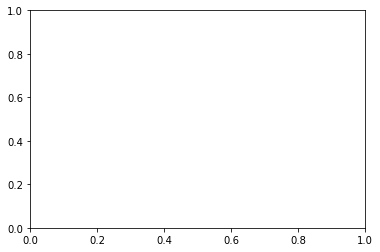

In [398]:
plt.plot(k_list[:],omega1[:])
# plt.xticks(np.arange(8,32,1))
plt.show()

In [399]:
# data3.growth_rate.isel(delta=0,N=0,t=0,gamma_index=0).values
data3

<xarray.Dataset>
Dimensions:      (t: 6, N: 1, delta: 1, gamma_index: 1, k: 5)
Coordinates:
  * t            (t) float64 0.0 1.241 2.482 3.724 4.965 6.206
  * k            (k) float64 0.1 5.1 10.1 15.1 20.1
  * N            (N) float64 0.003162
  * delta        (delta) float64 0.5
  * gamma_index  (gamma_index) float64 0.0
Data variables:
    growth_rate  (t, N, delta, gamma_index, k) float64 1.085 1.016 ... 1.113
    oscillation  (t, N, delta, gamma_index, k) float64 ...
    gamma        (t, N, delta, gamma_index, k) float64 ...

Text(0, 0.5, 'Growth Rate')

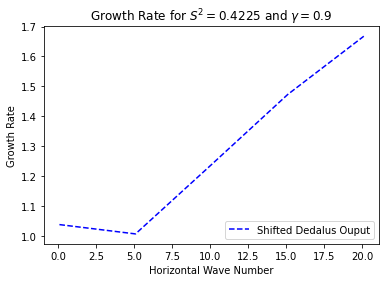

In [400]:
shft = 2.26 #2.45#4*np.pi/6
k_m = data3.k[:] #+k_shift(data3.growth_rate,shft)[:]
plt.plot(k_m[:],data3.growth_rate.isel(N=0,gamma_index=0,delta=0).mean(["t"])[:],color="b",linestyle="dashed",label="Shifted Dedalus Ouput")
# plt.plot(k_list[:-10],omega1[:-10],linestyle="dashed",c="r", label="Analytic solution")
# plt.hlines(w_max(),xmin=np.min([np.array([k_list[0]]),k_m.values[0]]),xmax=np.max([np.array([k_list[-1]]),k_m.values[-1]]),linestyles="dotted",color="k",label="Upper Limit of Analytical Solution")
plt.legend(loc="lower right")
plt.title(f"Growth Rate for $S^2=${S2} and $\gamma=${gamma}")
plt.xlabel("Horizontal Wave Number")
plt.ylabel("Growth Rate")

In [383]:
data3.k[23]

IndexError: index 23 is out of bounds for axis 0 with size 7

In [354]:
data3.growth_rate[23]

<xarray.DataArray 'growth_rate' ()>
array(1.597985)
Coordinates:
    k        float64 23.1

In [355]:
diff = (k_list[:]-data3.k[:])
omg = data3.growth_rate.isel()
top= (1+S2+np.power(omg,2))
bttm = S2*(-1*(1+np.power(omg,2))*(1-gamma)+gamma*S2)
np.median(diff*(bttm)**(0.5)/top)

2.2621744292714245

In [356]:
diff*(bttm)**(0.5)/top

<xarray.DataArray (k: 31)>
array([2.63052331, 2.389386  , 2.15695828, 1.96153791, 1.89269748,
       1.9179227 , 1.96042691, 2.00561629, 2.05050066, 2.0944871 ,
       2.13757246, 2.17986105, 2.2214112 , 2.26217443, 2.30195842,
       2.34039095, 2.37687639, 2.41054332, 2.44018867, 2.46423442,
       2.48072705, 2.48742128, 2.48197841, 2.46225564, 2.42658229,
       2.37388312, 2.30357886, 2.21531305, 2.10860817, 1.98250362,
       1.83511248])
Coordinates:
  * k        (k) float64 0.1 1.1 2.1 3.1 4.1 5.1 ... 26.1 27.1 28.1 29.1 30.1

In [357]:
k_shift(data3.growth_rate.isel(delta=0,N=0,gamma_index=0),shft)[:]

ValueError: Dimensions {'N', 'gamma_index', 'delta'} do not exist. Expected one or more of ('k',)

In [358]:
data4=xr.open_dataset("SI_non_dim_field_visc.nc")

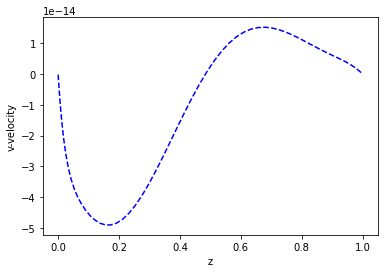

In [365]:
k_m = data4.z[:]
plt.plot(k_m[:],data4.v_structure.isel(k=-10)[:],color="b",linestyle="dashed",label="Dedalus Ouput")
plt.xlabel("z")
plt.ylabel("v-velocity")
plt.show()

In [207]:
data5=xr.open_dataset("PSI_non_dim_field_visc_high_res.nc")

In [208]:
data5.t

<xarray.DataArray 't' (t: 6)>
array([0.      , 1.241218, 2.482435, 3.723653, 4.96487 , 6.206088])
Coordinates:
  * t        (t) float64 0.0 1.241 2.482 3.724 4.965 6.206

/var/folders/n0/rsxpkn6j2xv8hrpk19m6_r6m0000gn/T/ipykernel_25026/704371041.py:1: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(data5.z,data5.t,data5.v_structure.isel(k=5))


Text(0.5, 0, 'v-velocity')

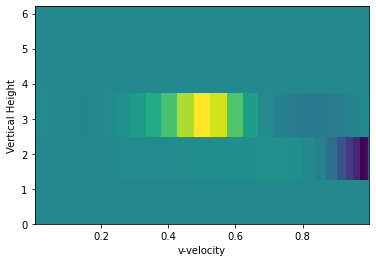

In [215]:
plt.pcolormesh(data5.z,data5.t,data5.v_structure.isel(k=5))
plt.ylabel("Vertical Height")
plt.xlabel("v-velocity")

In [216]:
plt.pcolormesh(data5.z,data5.t,data5.v_structure.sel(k=16) )

KeyError: "not all values found in index 'k'. Try setting the `method` keyword argument (example: method='nearest')."